<a href="https://colab.research.google.com/github/plaban1981/Hands-on-Machine-Learning/blob/master/Classification_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Mnist Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
import sklearn
m = sklearn.datasets.load_digits()

In [4]:
m.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

## Separate Features and Labels

In [5]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


784 features ,each image 28 x 28 pixels

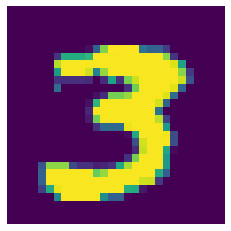

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[27]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image)
plt.axis('off')
plt.show()


## Train Split the sample data
MNIST is already split into 60000 training samples and 10000 test samples

Training set is already shuffled

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Training a Binary Classifier

In [0]:
import numpy as np

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
y_train_5

array([False, False, False, ..., False, False, False])

In [11]:
X_train.shape

(60000, 784)

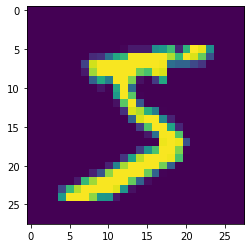

In [12]:
plt.imshow(X_train[np.argmax(y_train_5)].reshape(28,28))

## Stochastic Gradient Descent Classifier - This classifier has the capability of handling very large datasets efficiently.SGD deals with training instances independently - The number of classes has to be greater than one


####SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the classes, a binary classifier is learned that discriminates between that and all other classes.

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=2)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
predictions = sgd_clf.predict(X_test)

In [15]:
print(y_test[10])
print(predictions[10])

0
0


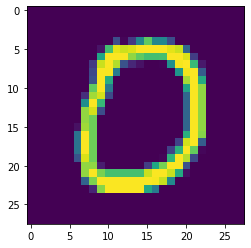

In [16]:
plt.imshow(X_test[10].reshape(28,28))

##Performance Measures

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.7956


##Measuring Accuracy using Cross-Validation

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=23,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train):
  clone_clf = clone(sgd_clf)
  x_train_folds = X_train[train_index]
  x_test_folds = X_train[test_index]
  y_train_folds = y_train[train_index]
  y_test_folds = y_train[test_index]
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred = clone_clf.predict(x_test_folds)
  n_correct = sum(y_pred == y_test_folds)
  print(f'accuracy of predictions {n_correct/len(y_pred)}')

accuracy of predictions 0.85795
accuracy of predictions 0.87895
accuracy of predictions 0.8882


- The StartifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
- At each iteration the code creates a clone of the classifier
- trains the clone on training folds and makes predictions on test folds.
- then it counts the number of correct predictions and outputs the ratio of correct predictions.

## Use cross_val_score() function to evaluate SGDClassifier model using K-fold cross validation with 3 folds

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87355, 0.86865, 0.8742 ])

##DumbClassifier

In [0]:
from sklearn.base import BaseEstimator
class dumbclassifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(Self,X):
    return np.zeros((len(X),1),dtype=bool)

In [21]:
never_5_clf = dumbclassifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([1., 1., 1.])

#### The accuracy score is 1 i.e. 100% ,because only 10% of the images are 5, so the classifier will always guess that an image is not 5.

Hence accuracy is generally not always the preferred performance measure for classifiers; especially when dealing with skewed datasets.

##Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.The general idea is to count the number of times instances of class A are classified as class B

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)

#### Note :
Just like cross_val_score() function, the cross_val_predict() function performs K_fold cross validation but instead of returning evaluation scores,it returmns predictions on each test fold

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))

[[5647    2   68   13   11   46   48    9   71    8]
 [   2 6438   56   31    6   15   10   16  159    9]
 [  56   65 5119  200   71   25   72   76  250   24]
 [  23   24  213 5273   13  169   26   59  274   57]
 [  24   35   52   18 5190   28   51   41  136  267]
 [ 100   27   67  362   63 4098  134   32  463   75]
 [  41   19  173   24   49   89 5415    3  102    3]
 [  23   27   83   44   48   17    5 5791   57  170]
 [  50  197  116  354   45  210   35   37 4733   74]
 [  34   36   34  129  234   62    2  556  238 4624]]


## Tryin a classification model to predict label as 5 or not 5

In [0]:
y = y.astype(int)

In [25]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=2)
for train_index,test_index in split.split(X,y):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]

In [0]:
y_train_5 = (y_train == 5) #true for all 5s and false for rest of the digits
y_test_5 = (y_test == 5 )

## Build a Classifier for the same 

In [0]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self,x,y=None):
    pass
  def predict(self,x):
    return np.zeros((len(x),1),dtype=bool)

In [29]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.91125   , 0.90964286, 0.90803571, 0.90901786, 0.91116071])

In [30]:
np.unique(y_train_5),np.unique(y_test_5)

(array([False,  True]), array([False,  True]))

In [0]:
y_train_5_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

##Confusion Matrix

In [32]:
confusion_matrix(y_train_5,y_train_5_predict)

array([[50453,   497],
       [ 1770,  3280]])

Text(33.0, 0.5, 'Actual Values')

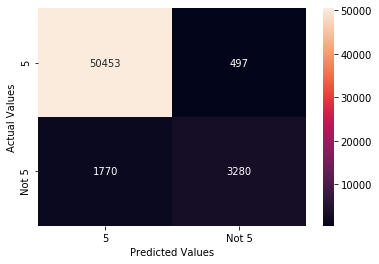

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cf  = confusion_matrix(y_train_5,y_train_5_predict)
sns.heatmap(cf,annot=True,fmt='g',xticklabels=['5','Not 5'],yticklabels=['5','Not 5'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

#### A perfect classifier will have only True positives and true negatives. So the confusion matrix would have non zero values only in its main  diagonal

Text(33.0, 0.5, 'Actual Values')

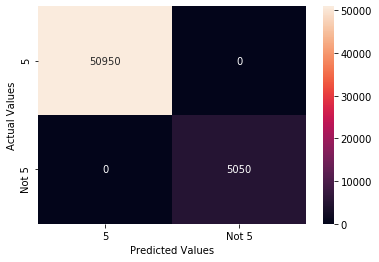

In [34]:
y_train_perfect_predictions = y_train_5
cf  = confusion_matrix(y_train_5,y_train_perfect_predictions)
sns.heatmap(cf,annot=True,fmt='g',xticklabels=['5','Not 5'],yticklabels=['5','Not 5'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

## Confusion Matix gives the following details
* positive predictions 
         precision = (True Positive) / (True Positive + False Positive)

* Ratio of positive instances that are correctly detected by the classifier
        recall / True Positive Rate/ sensitivity = 
                          (True Positive) / (True Positive + False Negative)

* F1 Score
         F1 score is the harmonic mean of precision and recall.
         Regular Mean treats all values equally where as the harmonic mean
         gives more weightage to low values.As a result classifier will get a 
         F1 Score when both precision and recall are high.

         F1 Score = 2 / ( 1/ precision + 1/recall)


In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(f' Precision :{precision_score(y_train_5,y_train_5_predict)}')
print(f' Recall :{recall_score(y_train_5,y_train_5_predict)}')
print(f' F1 Score :{f1_score(y_train_5,y_train_5_predict)}')

 Precision :0.8684140852528461
 Recall :0.6495049504950495
 F1 Score :0.7431743514217741


## Precision / Recall Trade off

The F1 Score favovrs classifiers that have similar precision and Recall.
But this is not really possible always. In some context we want a high recall while we care about a good precision.

Example:
* 1 

If we want to build a classifier to detect safe vieos for kids, in that case we will look for a high precision(keep only safe videos) and ignore recall (that is reject many good videos)

* 2

In a scenario where we want to build a classifier to detect shoplifters in survelliance images, in that scenario we are more concerned about recall (all possible cases, a few false alarms) than precision.

Increasing precision reduces recall and vice versa . This is called precision/recall trade off.



##SGD Classifier

This classifier makes its classification decision for each instance by computing a score bassed on decision function.

If the  score is greater than a threshold it assigns the instance to a positive class otherwise it assigns the instance to a negative class.

The higher the threshold the lower the recall and higher the precision.

Scikit Learn does not let to set a threshold but allows access to decision scores that is used to make predictions

In [36]:
X.shape

(70000, 784)

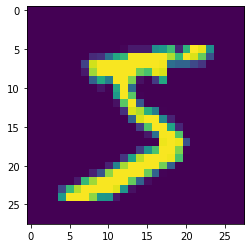

In [37]:
plt.imshow(X[0].reshape(28,28))

In [0]:
y_scores = sgd_clf.decision_function([X[0]])

In [39]:
y_scores

array([[-22376.559667  , -26989.54155815, -11851.1746418 ,
          1667.92496176, -19957.88593125,   5552.66268216,
        -20262.80835543,  -7659.54552565, -20069.90185718,
        -12726.61021683]])

In [40]:
threshold  = 0
y_scores > threshold

array([[False, False, False,  True, False,  True, False, False, False,
        False]])

In [41]:
X[0].reshape(28,28)[5]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   3.,  18.,  18.,  18., 126., 136., 175.,  26., 166., 255.,
       247., 127.,   0.,   0.,   0.,   0.])

## How to decide which Threshold function to use

In [0]:
#cross val predict to get decision scores of all instances in the training set

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5,method='decision_function')

## Build the Visualization pertaing to Precision and Recall Versus the decision Threshold

In [0]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold = precision_recall_curve(y_train_5,y_scores)

#### Define a function to plot the precion_recall vs Threshold

In [0]:
def plot_precision_recall_vs_threshold(precision,recall,threshold):
  sns.set_style('whitegrid')
  plt.plot(threshold,precision[:-1],'b--',label='Precision')
  plt.plot(threshold,recall[:-1],'g',label='Recall')
  #highlight the threshold add the legend,axis label and grid
  #plt.plot(threshold,'--')
  plt.legend()
  plt.xlabel('Threshold')
  plt.show()

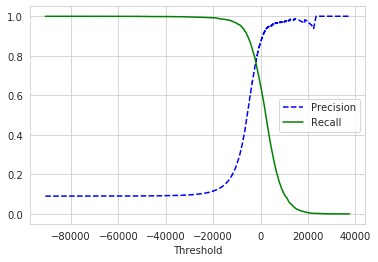

In [45]:
plot_precision_recall_vs_threshold(precision,recall,threshold)

Text(0, 0.5, 'Precision')

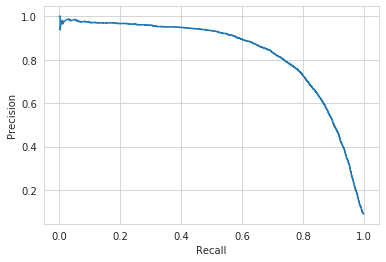

In [46]:
sns.set_style('whitegrid')
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

#### Note :
The precison really start to fall sharply when the recall is around 80%

Suppose we aim for a 90% precision

In [0]:
threshold_90_precision = threshold[np.argmax(precision >=0.90)]

In [48]:
threshold_90_precision

917.1084436437183

#### Making predictions on the training or test data instaed of calling the predict method we can now use the threshold value computed for 90 precent precision.

In [0]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [50]:
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [51]:
print(f' Precision :{precision_score(y_train_5,y_train_pred_90)}')
print(f' Recall :{recall_score(y_train_5,y_train_pred_90)}')
print(f' F1 Score :{f1_score(y_train_5,y_train_pred_90)}')

 Precision :0.9000605693519079
 Recall :0.5885148514851485
 F1 Score :0.7116858237547893


#### This gives us a 90% precision classifier

## ROC Reciever Operating Characteristic curve

* It is used as a measure of accuracy for binary classifiers.
* Similar to precision/recall curve  but instead of plotting precision versus recall, the ROC curve plots true positive rate against False Positive Rate.

FPR is the ration of negative instances that are incorrectly classified as negative.

True Negative Rate is also called Specificity

so ROC curve  = (1 - specificity) / Recall
              = FPR /TPR
              

In [0]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train_5,y_scores)

In [0]:
def plot_roc_curve(fpr,tpr,threshold,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')#dashed diagonal
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


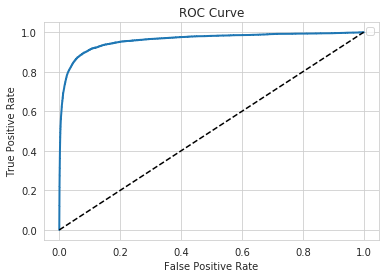

In [54]:
plot_roc_curve(fpr,tpr,threshold)

In [55]:
from sklearn.metrics import roc_auc_score
print(f'AUC : {roc_auc_score(y_train_5,y_scores)}')

AUC : 0.9607095405124416


#### Note

As a rule of thumb Precion Recall curve should be preferred whenver the positive class is rare or whenver we are more concerned about false positives than false negatives.

## Comapare ROC AUC curve for RandomForestClassifier and SGDClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
y_proba_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=5,method='predict_proba')
y_scores = y_proba_forest[:,1]

In [0]:
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores)

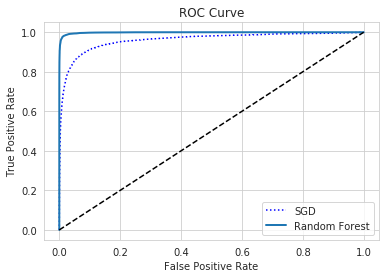

In [58]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,threshold_forest,label='Random Forest')
plt.show()


#### The random fores classifier is superior to SGD classifier as its ROC curve is much closer to the left top corner and it has a greater AUC

In [59]:
print(f'AUC Random Forest Classifier: {roc_auc_score(y_train_5,y_scores)}')

AUC Random Forest Classifier: 0.9985812881975146


## Multiclass Classification

* **Binary Classifier** - Distinguish between 2 classes
* **Multiclass / Multinomial Clasifier** - Distinguish between 2 or more classes

* Strict Binary Classifiers - Logistic Regression /  Support Vector Machine

* Models Capable of handling Multiclass Classification - SGD Classifiers,RandomForestClassifier,Naive Bayes

## Startegies for MultiClassification

- One Versus Rest 
       Train the model for each class and when we want to classify a specific class, we get the decision score from each classifier for specific class and we select the class whose classifier outputs the highest score.

- One Versus One 

        Train a binary classifier for every pair of digits.If there are N      classes we need to train N * (N - 1) / 2 classifiers.
        When we need to classify a specific class we need to run the data through N * (N -1) / 2 classifiers and see which class wins the most duels.

#### Main advantage of One Versus One classifier is that  each classifier only needs to b e trained on the part of the training dataset for the two classes it must distinguish.

OVO classifier is preferred in some algorithms (SVM) beacuse it is faster to train many classifiers on small training sets than to train few classifiers on large training sets.

For most Binary Classifiers One Versus Rest is preferred.


In [60]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)


ValueError: ignored

In [61]:
svm_clf.predict(X[0].reshape(1,-1))

array([5])

In [0]:
some_digit_scores = svm_clf.decision_function(X[0].reshape(1,-1))

In [64]:
some_digit_scores

array([[ 2.72422893,  1.72884272,  7.25183634,  8.30663332, -0.31174864,
         9.31326124,  1.71246426,  2.78476104,  6.22679284,  4.87318905]])

In [65]:
some_digit_scores.shape

(1, 10)

It returns 10 scores for per instance not just one

In [66]:
np.argmax(some_digit_scores)

5

In [67]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

Scikit-Learn automatically runs OVO or OVR depending on the classification algorithm.

We can force Scikit-Learn to use OVO(one versus one) or OVR (One versus Rest) classes

In [69]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [71]:
ovr_clf.predict(X[0].reshape(1,-1))

array([5])

## Training an SGDClassifier or RandomClassifier is easy and scikit-learn did not have to run OVR or OVO because these classifiers can directly classify instances into multiple classes.

#### The decision function method returns one value per class.